# Assignment 2

### Download the Colour Lena image, call it fc 
         ▶ convert fc to grayscale fg using 
                     • Averaging of r,g,b 
                     • Built-in function 
                     • Display grayscale images and check if there is any difference 
         ▶ Resize fg by factor 2 using
                    • Nearest Neighbor Interpolation (with and without Built-in function)
                    • Bi-linear Interpolation (with and without Built-in function)
                    • Bi-cubic interpolation (Using built-in function)  

#### Note:
#### Do all the above operations without built-in functions. Marks will be awarded only to those who don't use the inbuilt function.

In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Load the image

In [64]:
fc = cv2.imread('images/Lena.png')
# cv2.imshow('fc', fc)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Convert to Grayscale using averaging of r,g,b

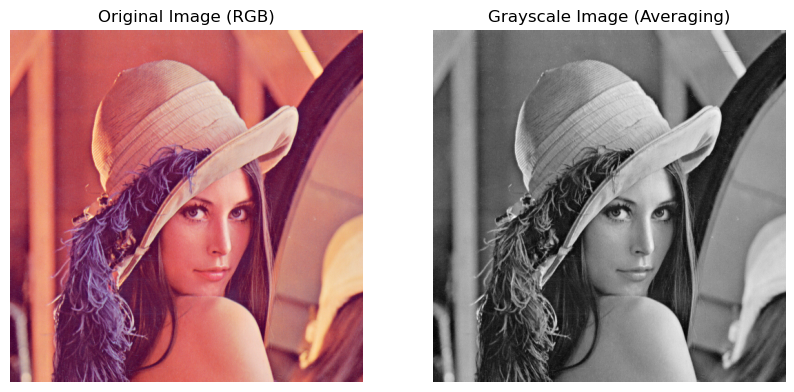

In [65]:
image_rgb = cv2.cvtColor(fc, cv2.COLOR_BGR2RGB)

# Convert to grayscale by averaging the R, G, and B channels
fg1 = np.mean(image_rgb, axis=2).astype(np.uint8)

# Display original and grayscale images (averaging)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

# Grayscale Image (Averaging)
plt.subplot(1, 2, 2)
plt.imshow(fg1, cmap='gray')
plt.title("Grayscale Image (Averaging)")
plt.axis('off')

plt.show()


### Convert Grayscale using BuiltIn Function

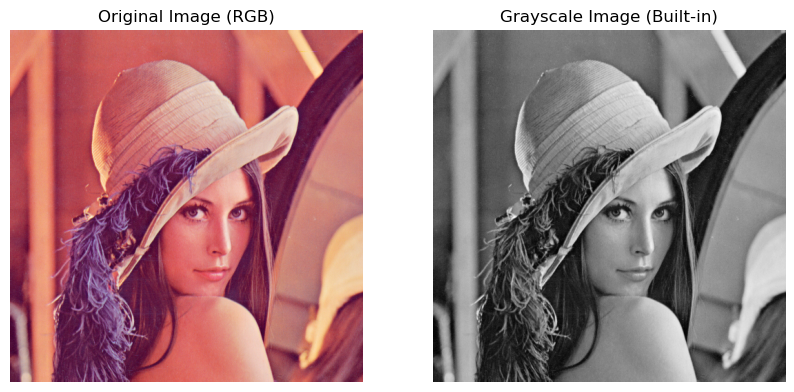

In [66]:
fg2 = cv2.cvtColor(fc, cv2.COLOR_BGR2GRAY)

# Display original and grayscale images (built-in function)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

# Grayscale Image (Built-in)
plt.subplot(1, 2, 2)
plt.imshow(fg2, cmap='gray')
plt.title("Grayscale Image (Built-in)")
plt.axis('off')
plt.show()

### Matrices of the two GrayScale Images

In [67]:
print("Matrix for Grayscale (Averaging):")
print(fg1)

print("\nMatrix for Grayscale (Built-in Function):")
print(fg2)

Matrix for Grayscale (Averaging):
[[162 162 164 ... 166 153 129]
 [162 162 164 ... 166 153 129]
 [162 162 164 ... 166 153 129]
 ...
 [ 54  54  59 ... 110 105 106]
 [ 53  53  63 ... 109 111 113]
 [ 53  53  63 ... 109 111 113]]

Matrix for Grayscale (Built-in Function):
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


In [68]:
mse = np.mean((fg1 - fg2) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 47.011802673339844


#### Built-in functions like cv2.cvtColor (OpenCV) use a weighted formula to account for human perception
#### Grayscale = 0.2989×R + 0.5870×G + 0.1140×B

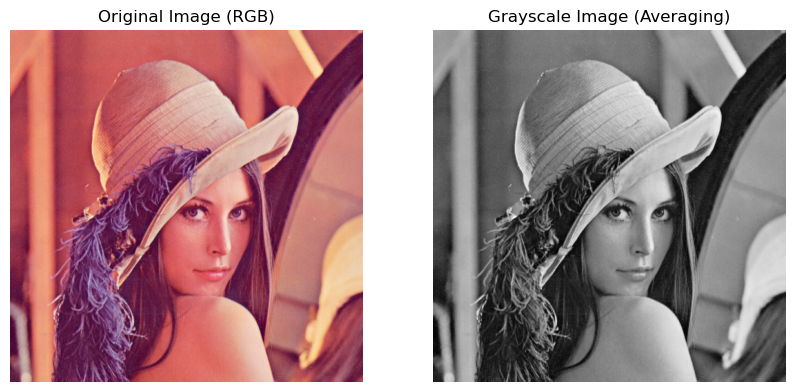

In [69]:
image_rgb = cv2.cvtColor(fc, cv2.COLOR_BGR2RGB)

# Convert to grayscale by averaging the R, G, and B channels
fg1 = (0.2989 * image_rgb[:, :, 0] + 
       0.5870 * image_rgb[:, :, 1] + 
       0.1140 * image_rgb[:, :, 2]).astype(np.uint8)

# Display original and grayscale images (averaging)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

# Grayscale Image (Averaging)
plt.subplot(1, 2, 2)
plt.imshow(fg1, cmap='gray')
plt.title("Grayscale Image (Averaging)")
plt.axis('off')

plt.show()


In [70]:
print("Matrix for Grayscale (Averaging):")
print(fg1)

print("\nMatrix for Grayscale (Built-in Function):")
print(fg2)

Matrix for Grayscale (Averaging):
[[162 162 162 ... 169 154 128]
 [162 162 162 ... 169 154 128]
 [162 162 162 ... 169 154 128]
 ...
 [ 42  42  49 ... 104  99  98]
 [ 43  43  54 ... 103 105 107]
 [ 43  43  54 ... 103 105 107]]

Matrix for Grayscale (Built-in Function):
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


In [71]:
mse = np.mean((fg1 - fg2) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.5201072692871094


## Interpolation

### Function for nearest neighbour Interpolation

In [72]:
def nearest_neighbor_resize(image, scale):
    rows, cols = image.shape
    new_rows, new_cols = int(rows * scale), int(cols * scale)
    resized = np.zeros((new_rows, new_cols), dtype=np.uint8)

    for i in range(new_rows):
        for j in range(new_cols):
            # Find nearest neighbor
            x = int(i / scale)
            y = int(j / scale)
            resized[i, j] = image[x, y]

    return resized

In [73]:
fg_nn_manual = nearest_neighbor_resize(fg2, 2)

In [74]:
fg_nn_builtin = cv2.resize(fg2, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

In [75]:
print("Manual Function for Nearest Neighbour Interpolation")
print(fg_nn_manual)

print("BuiltIn Function for Nearest Neighbour Interpolation")
print(fg_nn_builtin)

Manual Function for Nearest Neighbour Interpolation
[[162 162 162 ... 155 128 128]
 [162 162 162 ... 155 128 128]
 [162 162 162 ... 155 128 128]
 ...
 [ 44  44  44 ... 105 108 108]
 [ 44  44  44 ... 105 108 108]
 [ 44  44  44 ... 105 108 108]]
BuiltIn Function for Nearest Neighbour Interpolation
[[162 162 162 ... 155 128 128]
 [162 162 162 ... 155 128 128]
 [162 162 162 ... 155 128 128]
 ...
 [ 44  44  44 ... 105 108 108]
 [ 44  44  44 ... 105 108 108]
 [ 44  44  44 ... 105 108 108]]


In [76]:
mse = np.mean((fg_nn_manual - fg_nn_builtin) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0


### Function for Bi-Linear Interpolation

In [77]:
def bilinear(image, scale):
    rows, cols = image.shape
    new_rows, new_cols = int(rows * scale), int(cols * scale)
    resized = np.zeros((new_rows, new_cols), dtype=np.uint8)

    for i in range(new_rows):
        for j in range(new_cols):
            # Compute the floating-point coordinates
            x = (i + 0.5) / scale - 0.5
            y = (j + 0.5) / scale - 0.5

            # Get the integer part (floor values)
            x1 = int(np.floor(x))
            y1 = int(np.floor(y))

            # Get the fractional part (weights)
            dx = x - x1
            dy = y - y1

            # Ensure we don't go out of bounds
            x1 = np.clip(x1, 0, rows - 2)
            y1 = np.clip(y1, 0, cols - 2)

            x2 = x1 + 1
            y2 = y1 + 1

            # Interpolate the pixel values
            top_left = image[x1, y1]
            top_right = image[x1, y2]
            bottom_left = image[x2, y1]
            bottom_right = image[x2, y2]

            # Perform bilinear interpolation
            top = top_left * (1 - dy) + top_right * dy
            bottom = bottom_left * (1 - dy) + bottom_right * dy
            pixel_value = top * (1 - dx) + bottom * dx

            # Convert to uint8 and assign to the resized image
            resized[i, j] = np.clip(int(pixel_value), 0, 255)

    return resized


In [78]:
fg2 = cv2.cvtColor(fc, cv2.COLOR_BGR2GRAY)
fg_bilinear_manual = bilinear(fg2, 2)

In [79]:
fg_bilinear_builtin = cv2.resize(fg2, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

In [80]:
print("Manual Function for Bi Linear Interpolation")
print(fg_bilinear_manual)

print("BuiltIn Function for Bi-Linear Interpolation")
print(fg_bilinear_builtin)

BuiltIn Function for Bi-Linear Interpolation
[[162 162 162 ... 148 135 128]
 [162 162 162 ... 148 135 128]
 [162 162 162 ... 148 135 128]
 ...
 [ 44  44  44 ... 106 107 108]
 [ 44  44  44 ... 106 107 108]
 [ 44  44  44 ... 106 107 108]]


In [81]:
mse = np.mean((fg_bilinear_manual - fg_bilinear_builtin) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.41399192810058594


(-0.5, 1023.5, 1023.5, -0.5)

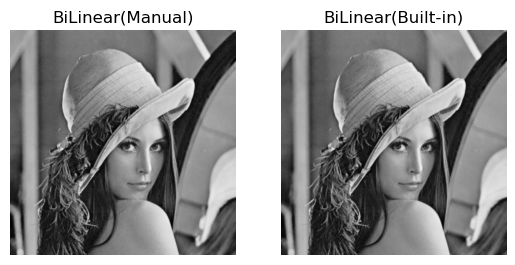

In [82]:
plt.subplot(1,2,1)
plt.imshow(fg_bilinear_manual, cmap='gray')
plt.title('BiLinear(Manual)')
plt.axis('off')

# Plot Nearest Neighbor (Built-in)
plt.subplot(1,2,2)
plt.imshow(fg_bilinear_builtin, cmap='gray')
plt.title('BiLinear(Built-in)')
plt.axis('off')

### Bi-Cubic Interpolation using In-Built Function

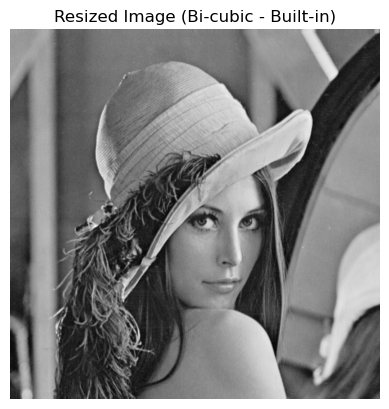

In [83]:
# Resize the grayscale image using OpenCV's built-in bi-cubic interpolation
fg_resized_bicubic_builtin = cv2.resize(fg2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Display the resized image
plt.imshow(fg_resized_bicubic_builtin, cmap='gray')
plt.title('Resized Image (Bi-cubic - Built-in)')
plt.axis('off')
plt.show()